Load Data

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Load pickled data
import pickle
import numpy as np
import csv

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/content/drive/My Drive/Colab Notebooks/Udacity/Traffic-Sign-Classifier/Data/train.p' 
validation_file = '/content/drive/My Drive/Colab Notebooks/Udacity/Traffic-Sign-Classifier/Data/valid.p'
testing_file = '/content/drive/My Drive/Colab Notebooks/Udacity/Traffic-Sign-Classifier/Data/test.p' 
signnames_file= '/content/drive/My Drive/Colab Notebooks/Udacity/Traffic-Sign-Classifier/Data/signnames.csv'
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

all_labels = []
with open(signnames_file, mode='r') as csvfile:
    names = csv.reader(csvfile, delimiter=',')
    for row in names:
        all_labels += [row[1]]
    all_labels=all_labels[1:]
    
print(all_labels)
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']


In [0]:
ls drive


'My Drive'/


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [0]:


# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [0]:
print(y_train)
y_train.shape
print(n_classes)
np.unique(y_train)

[41 41 41 ... 25 25 25]
43


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

([<matplotlib.axis.XTick at 0x7fa4f5498fd0>,
 <a list of 43 Text xticklabel objects>)

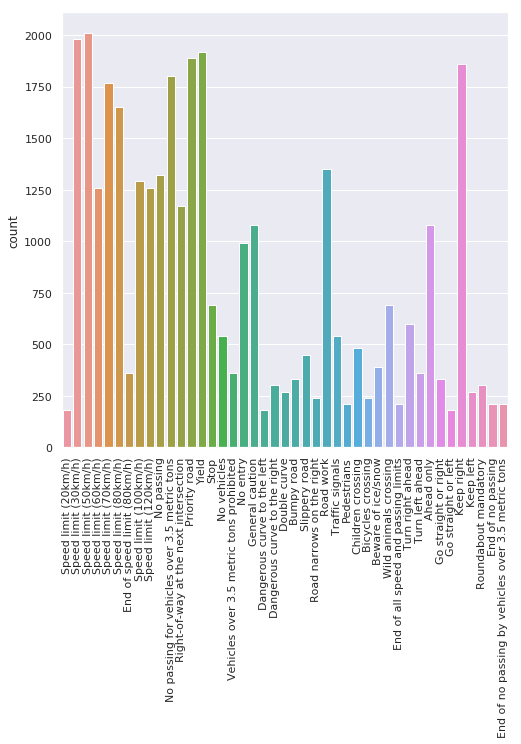

In [0]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import seaborn as sns
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
ax = sns.countplot(x=y_train)
plt.xticks(range(n_classes), all_labels, rotation='vertical')
#plt.xticks(rotation='vertical')



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)
Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [0]:
from sklearn.utils import shuffle

print(np.mean(X_train))
print(np.mean(X_test))

## Normalization

X_train_n = (X_train.astype(np.float32) - 128) / 128
X_test_n = (X_test.astype(np.float32) - 128)/128

print(np.mean(X_train_n))
print(np.mean(X_test_n))

#not used normalization
X_train, y_train = shuffle(X_train, y_train)


82.6775890369964
82.14846036120183
-0.35408133
-0.35821554


### Model Architecture

In [0]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
#tf.reset_default_graph()

EPOCHS = 70
BATCH_SIZE = 32

In [0]:
from tensorflow.contrib.layers import flatten
sess = tf.InteractiveSession()
tf.reset_default_graph()
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID',name='convolution1') + conv1_b
    print("layer 1 shape:",conv1.get_shape())
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)


    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3   = tf.nn.conv2d(conv1, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    print("layer 2 shape:",conv3.get_shape())
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID',name='convolution2')
    print("layer 2 shape:",conv3.get_shape())
    
    # SOLUTION: Layer 3: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv3, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    print("layer 3 shape:",conv2.get_shape())
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution3')
    print("layer 3 shape:",conv2.get_shape())
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1152, 64), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(64))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    print("layer 4 FC shape:",fc1.get_shape())
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # SOLUTION: Dropout.
    fc1 = tf.nn.dropout(fc1, keep_prob)

#     # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = 84.
#     fc2_W  = tf.Variable(tf.truncated_normal(shape=(64, 84), mean = mu, stddev = sigma))
#     fc2_b  = tf.Variable(tf.zeros(84))
#     fc2    = tf.matmul(fc1, fc2_W) + fc2_b
#     print("layer 5 FC shape:",fc2.get_shape())
    
#     # SOLUTION: Activation.
#     fc2    = tf.nn.relu(fc2)
    
#     # SOLUTION: Dropout.
#     fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 6: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(64, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1, fc3_W) + fc3_b
    print("layer 6 FC shape:",logits.get_shape())
    
    return logits


In [0]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [0]:
rate = 0.0005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Colocations handled automatically by placer.
layer 1 shape: (?, 30, 30, 32)
layer 2 shape: (?, 28, 28, 32)
layer 2 shape: (?, 14, 14, 32)
layer 3 shape: (?, 12, 12, 32)
layer 3 shape: (?, 6, 6, 32)
Instructions for updating:
Use keras.layers.flatten instead.
layer 4 FC shape: (?, 64)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
layer 6 FC shape: (?, 43)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



##Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [0]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
#         print(np.argmax(sess.run(logits, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0}),axis=1))
        accuracy,loss = sess.run([accuracy_operation,loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss/num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

Training...

EPOCH 1 ...
Validation Accuracy = 0.265

EPOCH 2 ...
Validation Accuracy = 0.466

EPOCH 3 ...
Validation Accuracy = 0.589

EPOCH 4 ...
Validation Accuracy = 0.732

EPOCH 5 ...
Validation Accuracy = 0.788

EPOCH 6 ...
Validation Accuracy = 0.870

EPOCH 7 ...
Validation Accuracy = 0.910

EPOCH 8 ...
Validation Accuracy = 0.932

EPOCH 9 ...
Validation Accuracy = 0.941

EPOCH 10 ...
Validation Accuracy = 0.941

EPOCH 11 ...
Validation Accuracy = 0.947

EPOCH 12 ...
Validation Accuracy = 0.963

EPOCH 13 ...
Validation Accuracy = 0.952

EPOCH 14 ...
Validation Accuracy = 0.954

EPOCH 15 ...
Validation Accuracy = 0.969

EPOCH 16 ...
Validation Accuracy = 0.967

EPOCH 17 ...
Validation Accuracy = 0.954

EPOCH 18 ...
Validation Accuracy = 0.965

EPOCH 19 ...
Validation Accuracy = 0.977

EPOCH 20 ...
Validation Accuracy = 0.972

EPOCH 21 ...
Validation Accuracy = 0.978

EPOCH 22 ...
Validation Accuracy = 0.974

EPOCH 23 ...
Validation Accuracy = 0.976

EPOCH 24 ...
Validation Accura

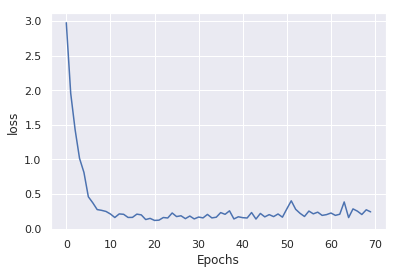

Model saved


In [0]:
#save_file = 'train_model.ckpt'
#saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    loss_accuracy_a=[]
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75})
            
        validation_accuracy,loss_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        loss_accuracy_a.append(loss_accuracy)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    plt.plot(range(0,EPOCHS),loss_accuracy_a)
    plt.ylabel('loss')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.show()     
    saver.save(sess, 'lenet')
    print("Model saved")

In [0]:
!ls
from google.colab import files
files.download('lenet.meta')
files.download('lenet.index')
#files.download('train_model.ckpt.data-00000-of-00001')
#files.download('train_model.ckpt.index')
#files.download('train_model.ckpt.meta')
files.download('lenet.data-00000-of-00001')

checkpoint  lenet.data-00000-of-00001  lenet.meta
drive	    lenet.index		       sample_data


## Uploading files from your local file system

`files.upload` returns a dictionary of the files which were uploaded.
The dictionary is keyed by the file name, the value is the data which was uploaded.

In [0]:
#import saved model
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


KeyboardInterrupt: ignored

## Importing trained model from Drive

In [0]:
import os
import matplotlib.image as mpimg
saved_data = os.listdir("/content/drive/My Drive/Colab Notebooks/Udacity/Traffic-Sign-Classifier/trained/last/")

In [0]:
print(saved_data)

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [0]:
with tf.Session() as sess:
    saver.restore(sess, 'lenet')
    print(np.mean(X_test))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy[0]))

INFO:tensorflow:Restoring parameters from lenet
82.14846036120183


TypeError: ignored

In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('/content/drive/My Drive/Colab Notebooks/Udacity/Traffic-Sign-Classifier/trained/Full_updated/lenet.meta')
    saver2.restore(sess, "lenet")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy[0]))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from lenet
Test Set Accuracy = 0.968


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

['60_kmh.jpg', 'stop_sign.jpg', 'left_turn.jpeg', 'yield_sign.jpg', 'road_work.jpg']


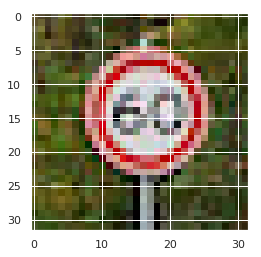

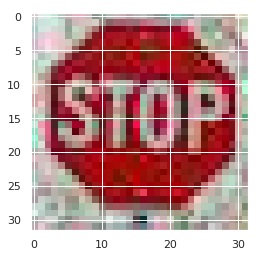

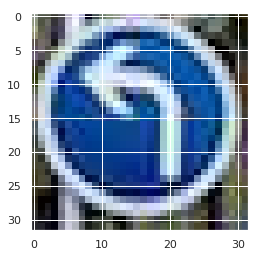

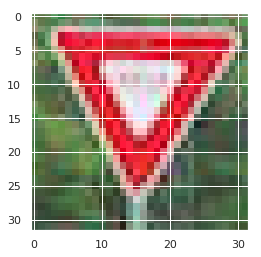

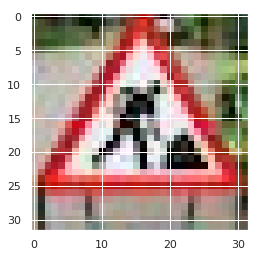

In [0]:
import os
import matplotlib.image as mpimg

new_images = os.listdir("/content/drive/My Drive/Colab Notebooks/Udacity/Traffic-Sign-Classifier/Data/New/")
print(new_images)
# Drop the mac's created '.DS_Store' file
#add_pics = add_pics[1:6]
#print(add_pics)

# Show the images, add to a list to process for classifying
new_images_data = []
for i in new_images:
    i = '/content/drive/My Drive/Colab Notebooks/Udacity/Traffic-Sign-Classifier/Data/New/' + i
    image = mpimg.imread(i)
    new_images_data.append(image)
    plt.imshow(image)
    plt.show()

In [0]:

# Make into numpy array
new_images_data = np.array(new_images_data)


print(np.mean(new_images_data))

## Normalization
# new_images_data = (new_images_data.astype(np.float32) - 128)/128

print(np.mean(new_images_data))
print(new_images_data.shape)

### Predict the Sign Type for Each Image. Analyze Performance

In [0]:
my_labels = [3, 14, 34, 13, 35]
with tf.Session() as sess:
    saver2.restore(sess, "lenet")
    test_accuracy = evaluate(new_images_data, my_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy[0]))


INFO:tensorflow:Restoring parameters from lenet
Test Accuracy = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [0]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2.restore(sess, 'lenet')
    
    new_softmax = sess.run(softmax_logits, feed_dict={x: new_images_data, keep_prob: 1.0})
    new_top_k = sess.run(top_k, feed_dict={x: new_images_data, keep_prob: 1.0})
    
    for x in range(len(new_images)):
        print("{0}:".format(new_images[x]))
        for y in range(5):
            print("{:s}: {:.2f}%".format(all_labels[new_top_k[1][x][y]], new_top_k[0][x][y]*100))
        print()
    print(new_softmax)
    print(new_top_k)

INFO:tensorflow:Restoring parameters from lenet
60_kmh.jpg:
Speed limit (80km/h): 99.56%
Speed limit (50km/h): 0.44%
Speed limit (100km/h): 0.00%
Speed limit (60km/h): 0.00%
No passing for vehicles over 3.5 metric tons: 0.00%

stop_sign.jpg:
Stop: 100.00%
Speed limit (60km/h): 0.00%
No entry: 0.00%
Road work: 0.00%
Speed limit (20km/h): 0.00%

left_turn.jpeg:
Turn left ahead: 100.00%
Ahead only: 0.00%
Keep right: 0.00%
Speed limit (20km/h): 0.00%
Speed limit (30km/h): 0.00%

yield_sign.jpg:
Yield: 100.00%
Speed limit (20km/h): 0.00%
Speed limit (30km/h): 0.00%
Speed limit (50km/h): 0.00%
Speed limit (60km/h): 0.00%

road_work.jpg:
Priority road: 99.42%
Road work: 0.58%
Right-of-way at the next intersection: 0.00%
No passing for vehicles over 3.5 metric tons: 0.00%
Speed limit (30km/h): 0.00%

[[0.00000000e+00 0.00000000e+00 4.44227690e-03 1.33026414e-14
  0.00000000e+00 9.95557725e-01 0.00000000e+00 1.48641421e-13
  1.60554938e-27 0.00000000e+00 1.32886688e-14 0.00000000e+00
  0.000000

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.




In [0]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [0]:
#outputFeatureMap(new_images_data[1], tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1)
#X_final_graph = new_images_data[1]
with tf.Session() as sess:
    X_final_graph = new_images_data
    saver2.restore(sess, 'lenet')
    
    conv1 = sess.graph.get_tensor_by_name('convolution1:0')
    outputFeatureMap(new_images_data,conv1, activation_min=-1, activation_max=-1, plt_num=1)
    conv2 = sess.graph.get_tensor_by_name('convolution2:0')
    outputFeatureMap(X_final_graph,conv2, activation_min=-1, activation_max=-1, plt_num=1)
    conv3 = sess.graph.get_tensor_by_name('convolution3:0')
    outputFeatureMap(X_final_graph,conv3, activation_min=-1, activation_max=-1, plt_num=1)

INFO:tensorflow:Restoring parameters from lenet


TypeError: ignored

In [0]:
sess = tf.Session()
op = sess.graph.get_operations()
[m.values() for m in op][1]